<a href="https://colab.research.google.com/github/EuroLifeWay/Project-pairs-trading/blob/main/Pair_Trading_universal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

# pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas as pd
# from pandas_datareader import data as pdr  #
import pandas_datareader as pdr
import yfinance as yf
# yf.pdr_override()

print("Pandas version:", pd.__version__)

Pandas version: 2.2.2


### Data Science in Trading

Before we begin, I‚Äôll first define a function that makes it easy to find cointegrated security pairs using the concepts we‚Äôve already covered.

–ü—Ä–µ–∂–¥–µ —á–µ–º –º—ã –Ω–∞—á–Ω–µ–º, —è —Å–Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –æ–±–ª–µ–≥—á–∞–µ—Ç –ø–æ–∏—Å–∫ –∫–æ–∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–∞—Ä —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥ —Å –ø–æ–º–æ—â—å—é —É–∂–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –Ω–∞–º–∏ –∫–æ–Ω—Ü–µ–ø—Ü–∏–π.

In [3]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

We are looking through a set of tech companies to see if any of them are cointegrated. We'll start by defining the list of securities we want to look through. Then we'll get the pricing data for each security from the year 2013 - 2018..

As mentioned before, we have formulated an economic hypothesis that there is some sort of link between a subset of securities within the tech sector and we want to test whether there are any cointegrated pairs. This incurs significantly less multiple comparisons bias than searching through hundreds of securities and slightly more than forming a hypothesis for an individual test.

–ú—ã –∏–∑—É—á–∞–µ–º –Ω–∞–±–æ—Ä —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–ø–∞–Ω–∏–π, —á—Ç–æ–±—ã –≤—ã—è—Å–Ω–∏—Ç—å, –µ—Å—Ç—å –ª–∏ —Å—Ä–µ–¥–∏ –Ω–∏—Ö –∫–æ–∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ. –î–ª—è –Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º —Å–ø–∏—Å–æ–∫ —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ—Å–º–æ—Ç—Ä–µ—Ç—å. –ó–∞—Ç–µ–º –º—ã –ø–æ–ª—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –æ —Ü–µ–Ω–∞—Ö –Ω–∞ –∫–∞–∂–¥—É—é —Ü–µ–Ω–Ω—É—é –±—É–º–∞–≥—É –∑–∞ –ø–µ—Ä–∏–æ–¥ —Å 2013 –ø–æ 2018 –≥–æ–¥.

–ö–∞–∫ —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–æ—Å—å, –º—ã —Å—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞–ª–∏ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–∏ –Ω–µ–∫–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ–º —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥ –≤ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º —Å–µ–∫—Ç–æ—Ä–µ –∏ —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –µ—Å—Ç—å –ª–∏ —Å—Ä–µ–¥–∏ –Ω–∏—Ö –∫–æ–∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä—ã. –≠—Ç–æ –¥–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ –æ—à–∏–±–æ–∫ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–∞–≤–Ω–µ–Ω–∏–π, —á–µ–º –ø–æ–∏—Å–∫ –ø–æ —Å–æ—Ç–Ω—è–º —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥, –∏ —á—É—Ç—å –±–æ–ª—å—à–µ, —á–µ–º —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≥–∏–ø–æ—Ç–µ–∑—ã –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ç–µ—Å—Ç–∞.

In [4]:
import datetime
import yfinance as yf

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime.now()

tickers = ['EURAUD=X', 'AUDCHF=X', 'EURUSD=X', 'GBPUSD=X', 'AUDJPY=X', 'NZDCHF=X']
# tickers = ['ES=F', 'SPY', 'NQ=F', 'QQQ', 'YM=F', 'YMAX', '^DJI', 'DJIA', '^RUT', 'IWM']
# tickers = ['ES=F', 'NQ=F']
# tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM',
#            'SPY', '^GSPC', '^SPX', '^IXIC', '^NDX', '^DJI', '^RUT', 'CL=F', 'GC=F', 'ES=F', 'NQ=F', 'QQQ', 'YM=F', 'YMAX', 'DJIA', 'IWM']

# ====================
# # –ó–∞–¥–∞–Ω–Ω—ã–µ —Ç–∞–π–º—Ñ—Ä–µ–π–º—ã (–∏–Ω—Ç–µ—Ä–≤–∞–ª—ã)
# intervals = ['1d', '1h', '90m', '15m', '5m', '3m', '1m']
interval = '5m'

# –°–ª–æ–≤–∞—Ä—å —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–∏–æ–¥–∞–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞,
# —Å —É—á–µ—Ç–æ–º –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π yfinance.
# 1m = 7 –¥–Ω–µ–π, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤–Ω—É—Ç—Ä–∏–¥–Ω–µ–≤–Ω—ã–µ (<1d) = 60 –¥–Ω–µ–π, –¥–Ω–µ–≤–Ω—ã–µ (>=1d) = max
max_periods = {
    '1d': 'max',
    '1h': '60d',
    '90m': '60d',
    '15m': '60d',
    '5m': '60d',
    '3m': '60d',
    '1m': 'max'#'8d'
}

period = max_periods[interval]

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å yfinance
df = yf.download(tickers, period=period, interval=interval, progress=False, auto_adjust=False)['Close']#, auto_adjust=False)
# ====================

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ —á–µ—Ä–µ–∑ yfinance
# df = yf.download(tickers, start=start, end=end)['Close']
df.tail()

Ticker                     AUDCHF=X   AUDJPY=X  EURAUD=X  EURUSD=X  GBPUSD=X  \
Datetime                                                                       
2025-08-07 20:20:00+00:00   0.52579  95.905998   1.78809  1.167133  1.344755   
2025-08-07 20:25:00+00:00   0.52568  95.904999   1.78853  1.167406  1.344899   
2025-08-07 20:30:00+00:00   0.52589  95.938004   1.78745  1.166725  1.344357   
2025-08-07 20:35:00+00:00   0.52585  95.941002   1.78785  1.166725  1.344375   
2025-08-07 20:40:00+00:00   0.52581  95.942001   1.78799  1.166861  1.344483   

Ticker                     NZDCHF=X  
Datetime                             
2025-08-07 20:20:00+00:00   0.48042  
2025-08-07 20:25:00+00:00   0.48036  
2025-08-07 20:30:00+00:00   0.48055  
2025-08-07 20:35:00+00:00   0.48051  
2025-08-07 20:40:00+00:00   0.48048

In [273]:
# df = full_data
# print(df)

In [5]:
len_df = len(df)
# len_df = len(full_df)
print(f'len(df): {len_df}')
print(f'5m –≤ —Å—É—Ç–∫–∞—Ö: {22*60/5}')
print(f'–î–Ω–µ–π –≤ df_len: {len_df / (22*60/5)}')
# # print(f'1m –≤ —Å—É—Ç–∫–∞—Ö: {22*60}')
# print(f'–î–Ω–µ–π –≤ df_len: {len_df / (22*60)}')

len(df): 17030
5m –≤ —Å—É—Ç–∫–∞—Ö: 264.0
–î–Ω–µ–π –≤ df_len: 64.50757575757575


1. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN –∑–Ω–∞—á–µ–Ω–∏–π

–ß—Ç–æ–±—ã –±—ã—Å—Ç—Ä–æ –Ω–∞–π—Ç–∏ —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥—ã DataFrame:

In [6]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN –∑–Ω–∞—á–µ–Ω–∏–π
print(df.isna().sum())  # –í—ã–≤–æ–¥–∏—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ

Ticker
AUDCHF=X     4
AUDJPY=X     3
EURAUD=X     3
EURUSD=X    23
GBPUSD=X    19
NZDCHF=X     3
dtype: int64


In [7]:
# –ò–ª–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ —Å—Ç—Ä–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ NaN
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)  # –ü–µ—á–∞—Ç–∞–µ—Ç —Å—Ç—Ä–æ–∫–∏ —Å NaN

Ticker                     AUDCHF=X   AUDJPY=X  EURAUD=X  EURUSD=X  GBPUSD=X  \
Datetime                                                                       
2025-05-28 21:35:00+00:00   0.53112  92.968002   1.75678       NaN       NaN   
2025-05-28 21:40:00+00:00   0.53111  92.952003   1.75685       NaN       NaN   
2025-05-28 21:50:00+00:00   0.53111  92.978996   1.75762       NaN       NaN   
2025-05-29 06:35:00+00:00   0.53502  93.689003   1.75109       NaN       NaN   
2025-06-05 07:15:00+00:00   0.53287  93.132004   1.75508       NaN       NaN   
2025-06-06 15:20:00+00:00   0.53403  93.976997   1.75567       NaN       NaN   
2025-06-06 15:25:00+00:00   0.53396  94.010002   1.75571       NaN       NaN   
2025-06-06 15:30:00+00:00   0.53376  93.996002   1.75558       NaN       NaN   
2025-06-06 15:40:00+00:00   0.53362  94.031998   1.75534       NaN       NaN   
2025-06-09 06:15:00+00:00   0.53427  93.971001   1.75382       NaN       NaN   
2025-06-10 15:10:00+00:00   0.53644  94.

2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

–ß—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (inf –∏ -inf), –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ isinf():

In [8]:
import numpy as np

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç—Ä–æ–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ inf –∏–ª–∏ -inf
inf_rows = df[~np.isfinite(df).all(axis=1)]

# # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
# inf_rows = df[~df.isfinite().all(axis=1)]
print(inf_rows)  # –ü–µ—á–∞—Ç–∞–µ—Ç —Å—Ç—Ä–æ–∫–∏ —Å inf

Ticker                     AUDCHF=X   AUDJPY=X  EURAUD=X  EURUSD=X  GBPUSD=X  \
Datetime                                                                       
2025-05-28 21:35:00+00:00   0.53112  92.968002   1.75678       NaN       NaN   
2025-05-28 21:40:00+00:00   0.53111  92.952003   1.75685       NaN       NaN   
2025-05-28 21:50:00+00:00   0.53111  92.978996   1.75762       NaN       NaN   
2025-05-29 06:35:00+00:00   0.53502  93.689003   1.75109       NaN       NaN   
2025-06-05 07:15:00+00:00   0.53287  93.132004   1.75508       NaN       NaN   
2025-06-06 15:20:00+00:00   0.53403  93.976997   1.75567       NaN       NaN   
2025-06-06 15:25:00+00:00   0.53396  94.010002   1.75571       NaN       NaN   
2025-06-06 15:30:00+00:00   0.53376  93.996002   1.75558       NaN       NaN   
2025-06-06 15:40:00+00:00   0.53362  94.031998   1.75534       NaN       NaN   
2025-06-09 06:15:00+00:00   0.53427  93.971001   1.75382       NaN       NaN   
2025-06-10 15:10:00+00:00   0.53644  94.

3. –£–¥–∞–ª–µ–Ω–∏–µ –∏–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ NaN –∏ inf –∑–Ω–∞—á–µ–Ω–∏–π

–ü–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ –≤—ã –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∏ —Å—Ç—Ä–æ–∫–∏ —Å NaN –∏–ª–∏ inf –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –≤—ã –º–æ–∂–µ—Ç–µ —É–¥–∞–ª–∏—Ç—å –∏—Ö –∏–ª–∏ –∑–∞–ø–æ–ª–Ω–∏—Ç—å:

* –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å NaN:

In [9]:
df_cleaned = df.dropna()  # –£–¥–∞–ª—è–µ—Ç –≤—Å–µ —Å—Ç—Ä–æ–∫–∏ —Å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∏–º NaN

* –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ NaN:

In [266]:
# df_filled = df.fillna(0)  # –ó–∞–ø–æ–ª–Ω—è–µ—Ç –≤—Å–µ NaN –Ω—É–ª—è–º–∏ (–≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ)

* –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å inf:

In [10]:
df_cleaned_inf = df[~df.isin([np.inf, -np.inf]).any(axis=1)]  # –û—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏ –±–µ–∑ inf

–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏

–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –∏–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ª—É—á—à–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤–∞—à DataFrame —Å–Ω–æ–≤–∞:

In [11]:
print(df_cleaned.isna().sum())  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –Ω–µ—Ç NaN
print((df_cleaned.isin([np.inf, -np.inf])).sum())  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –Ω–µ—Ç inf

Ticker
AUDCHF=X    0
AUDJPY=X    0
EURAUD=X    0
EURUSD=X    0
GBPUSD=X    0
NZDCHF=X    0
dtype: int64
Ticker
AUDCHF=X    0
AUDJPY=X    0
EURAUD=X    0
EURUSD=X    0
GBPUSD=X    0
NZDCHF=X    0
dtype: int64


In [12]:
df = df_cleaned

In [13]:
len_df_cleaned = len(df)
# len_df = len(full_df)
print(f'len(df): {len_df_cleaned}')
print(f'5m –≤ —Å—É—Ç–∫–∞—Ö: {22*60/5}')
print(f'–î–Ω–µ–π –≤ df_len: {len_df_cleaned / (22*60/5)}')
# # print(f'1m –≤ —Å—É—Ç–∫–∞—Ö: {22*60}')
# print(f'–î–Ω–µ–π –≤ df_len: {len_df / (22*60)}')

len(df): 17006
5m –≤ —Å—É—Ç–∫–∞—Ö: 264.0
–î–Ω–µ–π –≤ df_len: 64.41666666666667


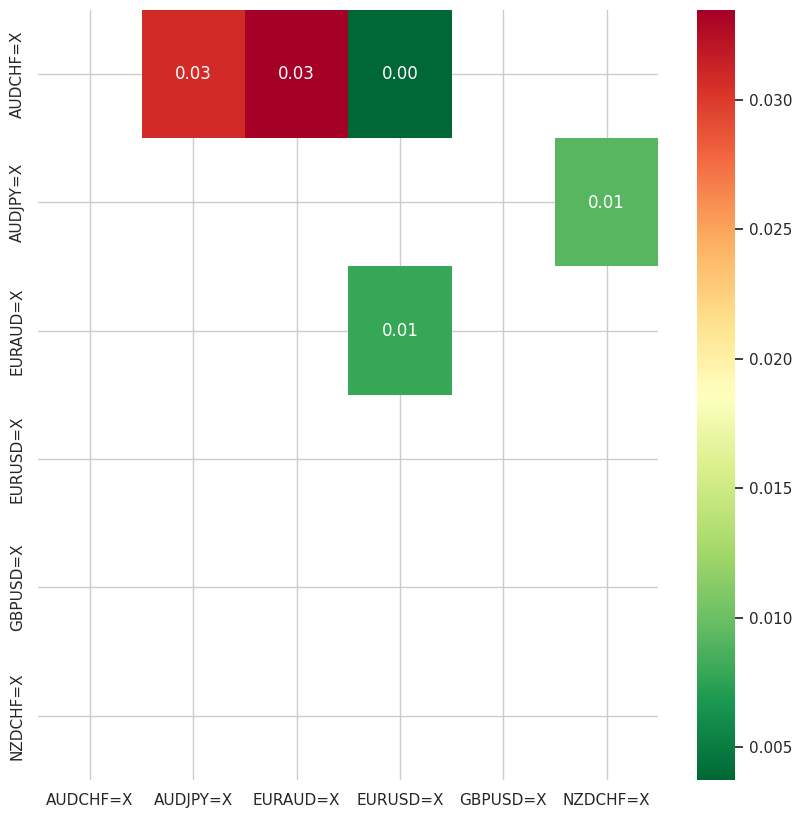

[('AUDCHF=X', 'AUDJPY=X'), ('AUDCHF=X', 'EURAUD=X'), ('AUDCHF=X', 'EURUSD=X'), ('AUDJPY=X', 'NZDCHF=X'), ('EURAUD=X', 'EURUSD=X')]


In [14]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(df)
# import seaborn
# fig, ax = plt.subplots(figsize=(10,10))
# seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r'
#                 , mask = (pvalues >= 0.05)
#                 )

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é, —á—Ç–æ —É –≤–∞—Å –µ—Å—Ç—å —Å–ø–∏—Å–æ–∫ —Ç–∏–∫–µ—Ä–æ–≤
tickers = df.columns.tolist()  # –∏–ª–∏ –≤–∞—à —Å–ø–∏—Å–æ–∫ —Ç–∏–∫–µ—Ä–æ–≤

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é, —á—Ç–æ pvalues ‚Äî —ç—Ç–æ –º–∞—Å—Å–∏–≤ numpy (n x n)
# –∏ –µ–≥–æ –ø–æ—Ä—è–¥–æ–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç tickers

# –°–æ–∑–¥–∞–π—Ç–µ DataFrame –∏–∑ pvalues —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ –∏ –∫–æ–ª–æ–Ω–∫–∞–º–∏ = tickers
pvalues_df = pd.DataFrame(pvalues, index=tickers, columns=tickers)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(
    pvalues_df,
    xticklabels=tickers,
    yticklabels=tickers,
    cmap='RdYlGn_r',
    mask=(pvalues_df >= 0.05),
    annot=True,  # –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –æ—Ç–æ–±—Ä–∞–∂–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è
    fmt=".2f"
)
plt.show()

print(pairs)

Our algorithm listed two pairs that are cointegrated: AAPL/EBAY, and ADBE/MSFT. We can analyze their price patterns to make sure there is nothing weird going on.

–ù–∞—à –∞–ª–≥–æ—Ä–∏—Ç–º —É–∫–∞–∑–∞–ª –¥–≤–µ –ø–∞—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ —è–≤–ª—è—é—Ç—Å—è –∫–æ–∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏: AAPL/EBAY –∏ ADBE/MSFT. –ú—ã –º–æ–∂–µ–º –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∏—Ö —Ü–µ–Ω–æ–≤—ã–µ –º–æ–¥–µ–ª–∏, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –Ω–∏—á–µ–≥–æ —Å—Ç—Ä–∞–Ω–Ω–æ–≥–æ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç.

In [22]:
pair = 2 # –í—ã–±–∏—Ä–∞–µ–º –ø–∞—Ä—É –ø–æ –Ω–æ–º–µ—Ä—É —Å–ø–∏—Å–∫–∞ –≤—ã—à–µ
names = pairs[pair]
print(names)
S1, S2 = np.log(df[names[0]]), np.log(df[names[1]])
# S1, S2 = np.log(df[names[0]].replace(0, np.nan)), np.log(df[names[1]].replace(0, np.nan))
# epsilon = 1e-10
# S1, S2 = np.log(df[names[0]] + epsilon), np.log(df[names[1]] + epsilon)
# S1 = df['NQ=F']
# S2 = df['QQQ']

score, pvalue, _ = coint(S1, S2)
# pvalue
print(f'P-value: {pvalue:.7f}')
# S1.tail()

('AUDCHF=X', 'EURUSD=X')
P-value: 0.0036592


In [26]:
pair = 2 # –í—ã–±–∏—Ä–∞–µ–º –ø–∞—Ä—É –ø–æ –Ω–æ–º–µ—Ä—É —Å–ø–∏—Å–∫–∞ –≤—ã—à–µ
names = pairs[pair]
print(names)
S1, S2 = df[names[0]], df[names[1]]
# S1 = df['NQ=F']
# S2 = df['QQQ']

score, pvalue, _ = coint(S1, S2)
# pvalue
print(f'P-value: {pvalue:.7f}')
# S1.tail()

('AUDCHF=X', 'EURUSD=X')
P-value: 0.0037336


In [16]:
# S1 = df['EURUSD=X']
# S2 = df['GBPUSD=X']

# score, pvalue, _ = coint(S1, S2)
# pvalue

In [20]:
# S1 = df['AUDCHF=X']
# S2 = df['NZDCHF=X']

# score, pvalue, _ = coint(S1, S2)
# pvalue

np.float64(0.004030969836152772)

As we can see, the p-value is less than 0.05, which means ADBE and MSFT are indeed cointegrated pairs.

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, p-–∑–Ω–∞—á–µ–Ω–∏–µ –º–µ–Ω—å—à–µ 0,05, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ ADBE –∏ MSFT –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —è–≤–ª—è—é—Ç—Å—è –∫–æ–∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–∏.

#### Calculating the Spread

Now we can plot the spread of the two time series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities, as mentioned with the Engle-Granger method before.

–¢–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ —Å–ø—Ä–µ–¥–∞ –¥–≤—É—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤. –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å —Å–ø—Ä–µ–¥, –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—É—é –º—ã –ø–æ—Å—Ç—Ä–æ–∏–º –º–µ–∂–¥—É –Ω–∞—à–∏–º–∏ –¥–≤—É–º—è —Ü–µ–Ω–Ω—ã–º–∏ –±—É–º–∞–≥–∞–º–∏, –∫–∞–∫ —É–∂–µ —É–ø–æ–º–∏–Ω–∞–ª–æ—Å—å –≤ –º–µ—Ç–æ–¥–µ –≠–Ω–≥–ª–∞-–ì—Ä–µ–π–Ω–¥–∂–µ—Ä–∞.

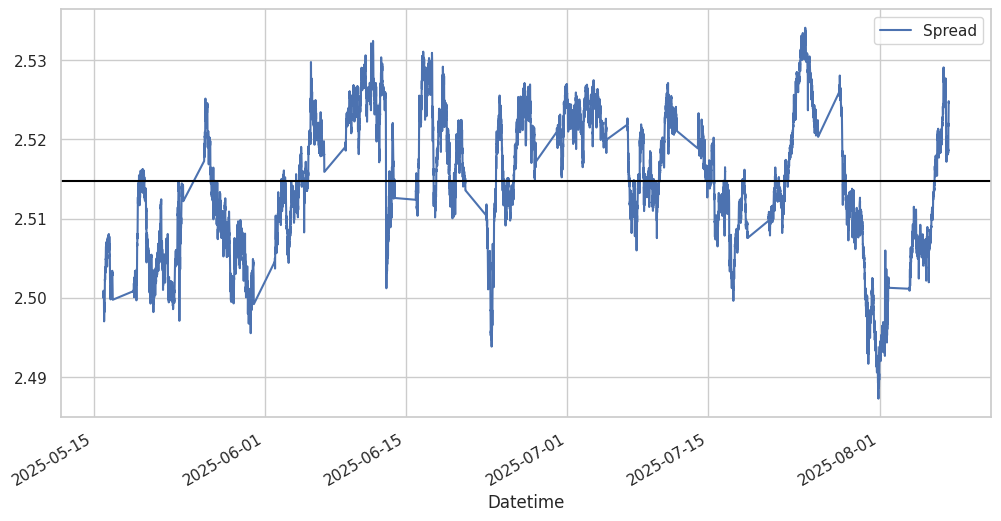

In [27]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
# S1 = S1['NQ=F']
# b = results.params['NQ=F']
S1 = S1[names[0]]
b = results.params[names[0]]

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
# plt.xlim('2019-01-01', datetime.datetime.now())
# end_date = df.index.max()
# start_date = end_date - pd.Timedelta(period)
# plt.xlim(start_date, datetime.datetime.now())
plt.legend(['Spread']);

Alternatively, we can examine the ration between the two time series

–í –∫–∞—á–µ—Å—Ç–≤–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã –º—ã –º–æ–∂–µ–º –∏–∑—É—á–∏—Ç—å —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–µ–∂–¥—É –¥–≤—É–º—è –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Ä—è–¥–∞–º–∏

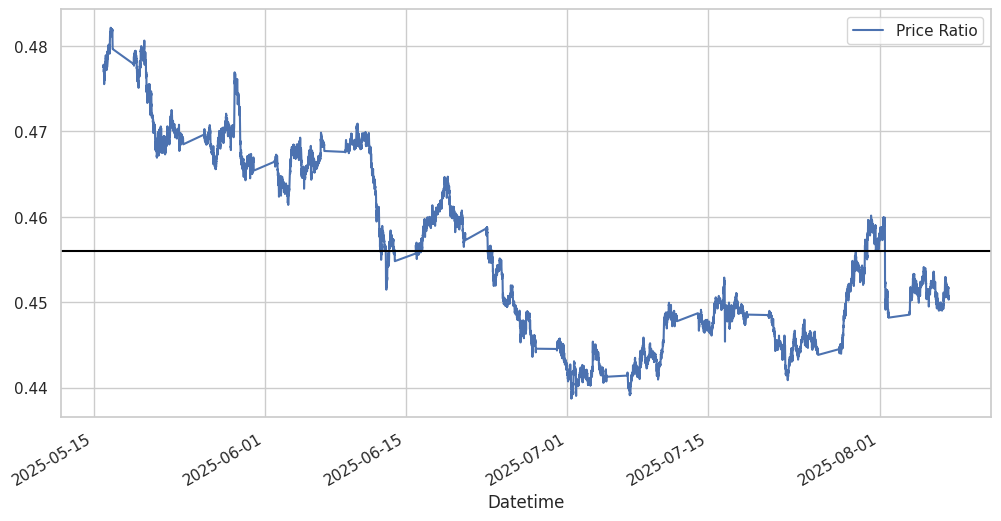

In [28]:
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
# plt.xlim('2019-01-01', datetime.datetime.now())
# end_date = df.index.max()
# start_date = end_date - pd.Timedelta(period)
# plt.xlim(start_date, datetime.datetime.now())
plt.legend(['Price Ratio']);

Regardless of whether or not we use the spread approach or the ratio approach, we can see that our first plot pair ADBE/MSFT tends to move around the mean. We now need to standardize this ratio because the absolute ratio might not be the most ideal way of analyzing this trend. For this, we need to use z-scores.

A z-score is the number of standard deviations a datapoint is from the mean. More importantly, the nmber of standard deviations above or below the population mean is from the raw score. The z-score is calculated by the follow:

–ù–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç —Ç–æ–≥–æ, –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏ –º—ã –ø–æ–¥—Ö–æ–¥ —Å–ø—Ä–µ–¥–∞ –∏–ª–∏ –ø–æ–¥—Ö–æ–¥ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è, –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞—à–∞ –ø–µ—Ä–≤–∞—è –ø–∞—Ä–∞ ADBE/MSFT –∏–º–µ–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –¥–≤–∏–≥–∞—Ç—å—Å—è –≤–æ–∫—Ä—É–≥ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è. –¢–µ–ø–µ—Ä—å –Ω–∞–º –Ω—É–∂–Ω–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ —Å–∞–º—ã–º –∏–¥–µ–∞–ª—å–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º –∞–Ω–∞–ª–∏–∑–∞ —ç—Ç–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏. –î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–º –Ω—É–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å z-—Å–∫–æ—Ä.

z-score - —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π —Ç–æ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è. –ß—Ç–æ –µ—â–µ –±–æ–ª–µ–µ –≤–∞–∂–Ω–æ, —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –≤—ã—à–µ –∏–ª–∏ –Ω–∏–∂–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–ø—É–ª—è—Ü–∏–∏ –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –±–∞–ª–ª–∞. z-—Å–∫–æ—Ä —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

$$\mathcal{z}_{i}=\frac{x_{i}-\bar{x}}{s} $$

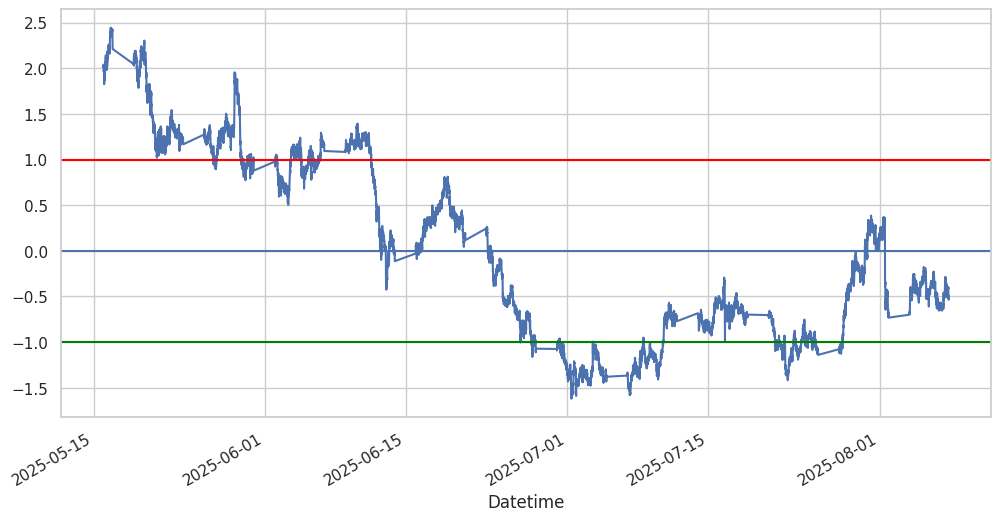

In [29]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
# plt.xlim('2019-01-01', datetime.datetime.now())
# plt.xlim('2025-07-06', datetime.datetime.now())
#
# end_date = df.index.max()
# start_date = end_date - pd.Timedelta(period)
# plt.xlim(start_date, datetime.datetime.now())
#
plt.show()

By setting two other lines placed at the z-score of 1 and -1, we can clearly see that for the most part, any big divergences from the mean eventually converges back. This is exactly what we want for a pairs trading strategy.

–ü—Ä–æ–≤–µ–¥—è –µ—â–µ –¥–≤–µ –ª–∏–Ω–∏–∏, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –Ω–∞ z-score 1 –∏ -1, –º—ã –º–æ–∂–µ–º —á–µ—Ç–∫–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –ª—é–±—ã–µ –±–æ–ª—å—à–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–Ω–µ—á–Ω–æ–º –∏—Ç–æ–≥–µ —Å—Ö–æ–¥—è—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ. –≠—Ç–æ –∏–º–µ–Ω–Ω–æ —Ç–æ, —á—Ç–æ –Ω–∞–º –Ω—É–∂–Ω–æ –¥–ª—è —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ø–∞—Ä–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏.

### Trading Signals

When conducting any type of trading strategy, it's always important to clearly define and delineate at what point you will actually do a trade. As in, what is the best indicator that I need to buy or sell a particular stock?

–ü—Ä–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ª—é–±–æ–π —Ç–æ—Ä–≥–æ–≤–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –≤—Å–µ–≥–¥–∞ –≤–∞–∂–Ω–æ —á–µ—Ç–∫–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –≤ –∫–∞–∫–æ–π –º–æ–º–µ–Ω—Ç –≤—ã –±—É–¥–µ—Ç–µ —Å–æ–≤–µ—Ä—à–∞—Ç—å —Å–¥–µ–ª–∫—É. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∫–æ–≤ –Ω–∞–∏–ª—É—á—à–∏–π –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä —Ç–æ–≥–æ, —á—Ç–æ –º–Ω–µ –Ω—É–∂–Ω–æ –ø–æ–∫—É–ø–∞—Ç—å –∏–ª–∏ –ø—Ä–æ–¥–∞–≤–∞—Ç—å —Ç—É –∏–ª–∏ –∏–Ω—É—é –∞–∫—Ü–∏—é?

#### Setup rules

We're going to use the ratio time series that we've created to see if it tells us whether to buy or sell a particular moment in time. We'll start off by creating a prediction variable $Y$. If the ratio is positive, it will signal a "buy," otherwise, it will signal a sell. The prediction model is as follows:

–ú—ã —Å–æ–±–∏—Ä–∞–µ–º—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–æ–∑–¥–∞–Ω–Ω—ã–π –Ω–∞–º–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –ª–∏ –æ–Ω –Ω–∞–º, –ø–æ–∫—É–ø–∞—Ç—å –∏–ª–∏ –ø—Ä–æ–¥–∞–≤–∞—Ç—å –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏. –î–ª—è –Ω–∞—á–∞–ª–∞ –º—ã —Å–æ–∑–¥–∞–¥–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –ø—Ä–æ–≥–Ω–æ–∑–∞ ùëå . –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –±—É–¥–µ—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º, —ç—Ç–æ –±—É–¥–µ—Ç —Å–∏–≥–Ω–∞–ª–æ–º –∫ –ø–æ–∫—É–ø–∫–µ, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ - –∫ –ø—Ä–æ–¥–∞–∂–µ. –ú–æ–¥–µ–ª—å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

$$Y_{t} = sign(Ratio_{t+1}-Ratio_{t}) $$

What's great about pair trading signals is that we don't need to know absolutes about where the prices will go, all we need to know is where it's heading: up or down.

–ß—Ç–æ —Å–∞–º–æ–µ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–µ –≤ —Å–∏–≥–Ω–∞–ª–∞—Ö –ø–∞—Ä–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏, —Ç–∞–∫ —ç—Ç–æ —Ç–æ, —á—Ç–æ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ–≥–æ, –∫—É–¥–∞ –ø–æ–π–¥–µ—Ç —Ü–µ–Ω–∞, –≤—Å–µ, —á—Ç–æ –Ω–∞–º –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å, —ç—Ç–æ —Ç–æ, –∫—É–¥–∞ –æ–Ω–∞ –Ω–∞–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è: –≤–≤–µ—Ä—Ö –∏–ª–∏ –≤–Ω–∏–∑.

#### Train Test Split

When training and testing a model, it's common to have splits of 70/30 or 80/20. We only used a time series of 252 points (which is the amount of trading days in a year). Before training and splitting the data, we will add more data points in each time series.

–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ 70/30 –∏–ª–∏ 80/20. –ú—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –∏–∑ 252 —Ç–æ—á–µ–∫ (—ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—Ä–≥–æ–≤—ã—Ö –¥–Ω–µ–π –≤ –≥–æ–¥—É). –ü–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –∏ —Ä–∞–∑–±–∏–µ–Ω–∏–µ–º –¥–∞–Ω–Ω—ã—Ö –º—ã –¥–æ–±–∞–≤–∏–º –±–æ–ª—å—à–µ —Ç–æ—á–µ–∫ –¥–∞–Ω–Ω—ã—Ö –≤ –∫–∞–∂–¥—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥.

In [30]:
ratios = S1 / S2
# ratios = df['AUDCHF=X'] / df['NZDCHF=X']
train_len_ratios = round(len(ratios) * .70)
print(f'len(ratios): {train_len_ratios}')
print(f'?5m Days train: {train_len_ratios / 276}')
print(f'?5m Days test: {train_len_ratios / 276 / 70 * 30}')

len(ratios): 11904
?5m Days train: 43.130434782608695
?5m Days test: 18.48447204968944


In [131]:
# ratios = df['AUDCHF=X'] / df['NZDCHF=X']
# print(len(ratios) * .70 ) # 70 –¥–ª—è 1D

In [31]:
train = ratios[:train_len_ratios]
test = ratios[train_len_ratios:]

In [132]:
# train = ratios[:1509]
# test = ratios[1509:]

#### Feature Engineering / –ò–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

* 60 day Moving Average of Ratio
* 5 day Moving Average of Ratio
* 60 day Standard Deviation
* z-score

–ù–∞–º –Ω—É–∂–Ω–æ –≤—ã—è—Å–Ω–∏—Ç—å, –∫–∞–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤–∞–∂–Ω—ã –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –¥–≤–∏–∂–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤. –ó–Ω–∞—è, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –≤—Å–µ–≥–¥–∞ –≤ –∫–æ–Ω–µ—á–Ω–æ–º –∏—Ç–æ–≥–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è –∫ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é, –≤–æ–∑–º–æ–∂–Ω–æ, —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ –∏ –º–µ—Ç—Ä–∏–∫–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å–æ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –±—É–¥—É—Ç –≤–∞–∂–Ω—ã.

–î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏:

* 60-–¥–Ω–µ–≤–Ω–∞—è —Å–∫–æ–ª—å–∑—è—â–∞—è —Å—Ä–µ–¥–Ω—è—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞
* 5-–¥–Ω–µ–≤–Ω–∞—è —Å–∫–æ–ª—å–∑—è—â–∞—è —Å—Ä–µ–¥–Ω—è—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞
* 60-–¥–Ω–µ–≤–Ω–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
* z-score

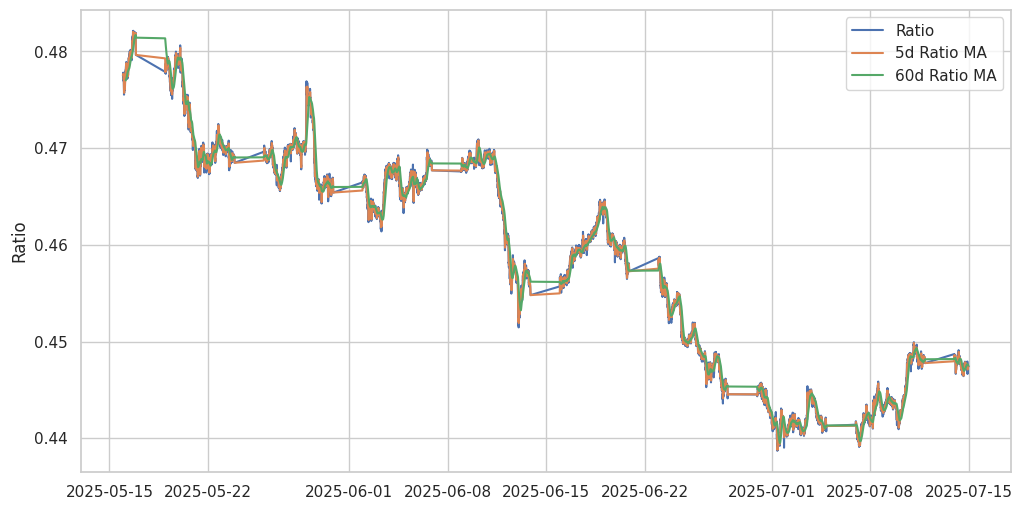

In [32]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

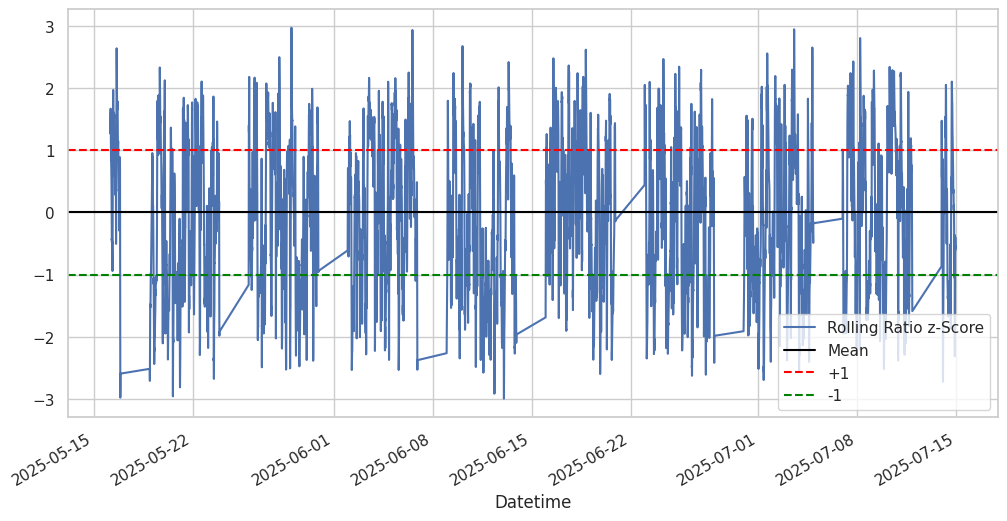

In [33]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
# plt.xlim('2019-03-25', '2023-07-01')
# plt.xlim('2025-07-06', datetime.datetime.now())
# end_date = df.index.max()
# start_date = end_date - pd.Timedelta(period)
# plt.xlim(start_date, datetime.datetime.now())
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

#### Creating a Model

A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:

* Buy (1) whenever the z-score is below -1, meaning we expect the ratio to increase.
* Sell (-1) whenever the z-score is above 1, meaning we expect the ratio to decrease.

–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 0 –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 1. –ì–ª—è–¥—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫, —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —è—Å–Ω–æ, —á—Ç–æ –µ—Å–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –≤—ã—Ö–æ–¥–∏—Ç –∑–∞ –ø—Ä–µ–¥–µ–ª—ã —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 1 —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ, —Ç–æ –æ–Ω —Å—Ç—Ä–µ–º–∏—Ç—Å—è –≤–µ—Ä–Ω—É—Ç—å—Å—è –∫ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é. –ò—Å–ø–æ–ª—å–∑—É—è —ç—Ç–∏ –º–æ–¥–µ–ª–∏, –º—ã –º–æ–∂–µ–º —Å–æ–∑–¥–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ —Ç–æ—Ä–≥–æ–≤—ã–µ —Å–∏–≥–Ω–∞–ª—ã:

* –ü–æ–∫—É–ø–∞—Ç—å (1) (Buy) –≤—Å—è–∫–∏–π —Ä–∞–∑, –∫–æ–≥–¥–∞ z-score –Ω–∏–∂–µ -1, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º—ã –æ–∂–∏–¥–∞–µ–º —É–≤–µ–ª–∏—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞.
* –ü—Ä–æ–¥–∞–≤–∞—Ç—å (-1) (Sell), –∫–æ–≥–¥–∞ z-score –≤—ã—à–µ 1, —Ç–æ –µ—Å—Ç—å –º—ã –æ–∂–∏–¥–∞–µ–º, —á—Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–º–µ–Ω—å—à–∏—Ç—Å—è.

#### Training Optimizing / –û–±—É—á–µ–Ω–∏–µ –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è

We can use our model on actual data

–ú—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞—à—É –º–æ–¥–µ–ª—å –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

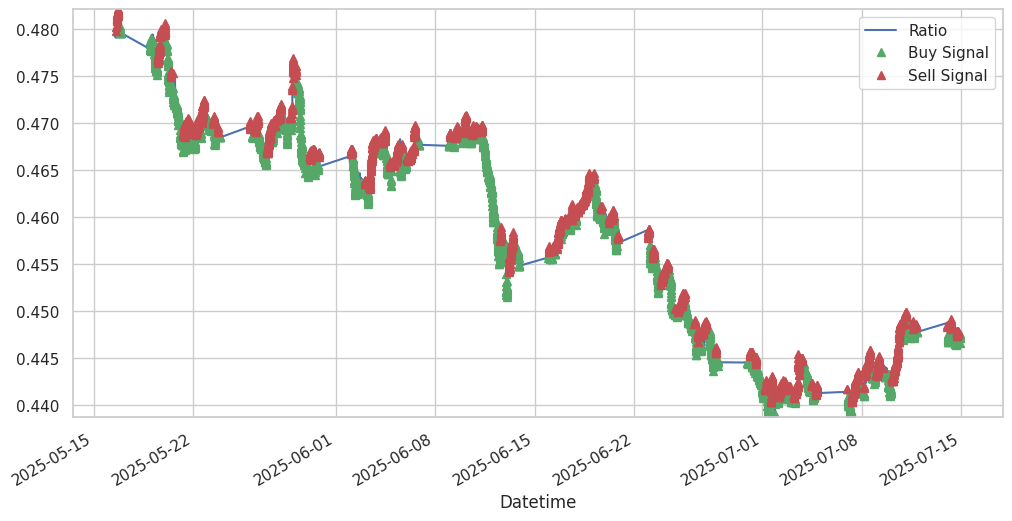

In [34]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
# plt.xlim('2019-08-15','2023-07-07')
# plt.xlim('2025-07-01', datetime.datetime.now())
# plt.xlim('2025-07-01', df.index.max())
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

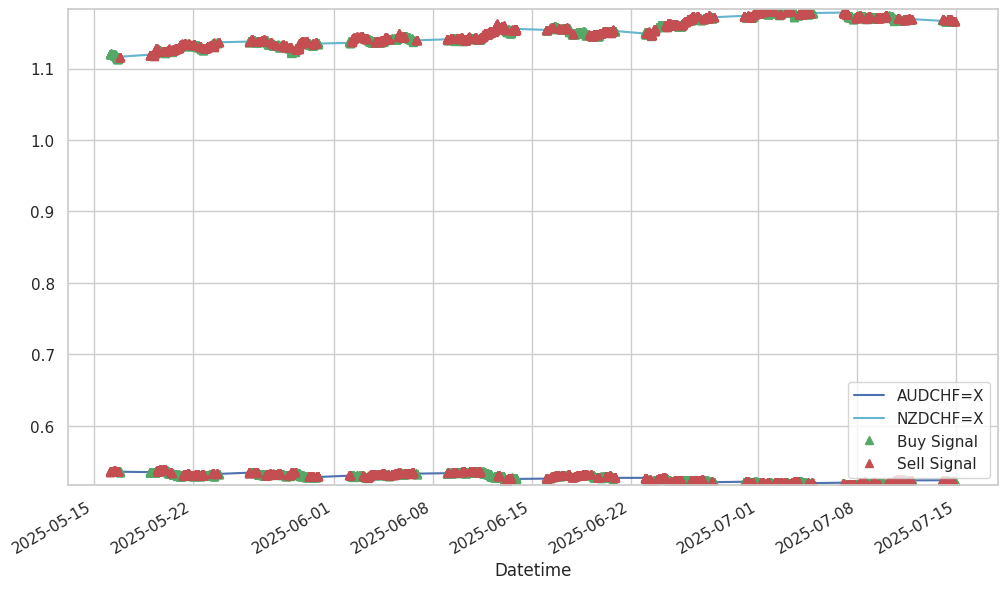

In [35]:
plt.figure(figsize=(12,7))
S1 = df[names[0]].iloc[:train_len_ratios]
S2 = df[names[1]].iloc[:train_len_ratios]
# S1 = df['AUDCHF=X'].iloc[:train_len_ratios]
# S2 = df['NZDCHF=X'].iloc[:train_len_ratios]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
# plt.ylim(25, 105)
# plt.xlim('2019-03-22', '2023-07-04')

plt.legend(['AUDCHF=X', 'NZDCHF=X', 'Buy Signal', 'Sell Signal'])
plt.show()

Now we can clearly see when we should buy or sell on the respective stocks.

Now, how much can we expect to make of this strategy?

–¢–µ–ø–µ—Ä—å –º—ã —á–µ—Ç–∫–æ –≤–∏–¥–∏–º, –∫–æ–≥–¥–∞ –Ω–∞–º —Å–ª–µ–¥—É–µ—Ç –ø–æ–∫—É–ø–∞—Ç—å –∏–ª–∏ –ø—Ä–æ–¥–∞–≤–∞—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∞–∫—Ü–∏–∏.

–ò—Ç–∞–∫, —Å–∫–æ–ª—å–∫–æ –º—ã –º–æ–∂–µ–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å –∑–∞—Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏?

In [36]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore.iloc[i] < -1:
            money += S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            countS1 -= 1
            countS2 += ratios.iloc[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore.iloc[i] > 1:
            money -= S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            countS1 += 1
            countS2 -= ratios.iloc[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore.iloc[i]) < 0.75:
            money += S1.iloc[i] * countS1 + S2.iloc[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))


    return money

In [37]:
# result = trade(df['AUDCHF=X'].iloc[1509:], df['NZDCHF=X'].iloc[1509:], 60, 5)
result = trade(df[names[0]].iloc[train_len_ratios:], df[names[1]].iloc[train_len_ratios:], 60, 5)
print(f"{result * 100:.2f}%")

69.00%


Not a bad profit for a strategy that is made from stratch.

–ù–µ–ø–ª–æ—Ö–∞—è –ø—Ä–∏–±—ã–ª—å –¥–ª—è —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏, —Å–¥–µ–ª–∞–Ω–Ω–æ–π –∏–∑ —Å—Ç—Ä–∞—Ç–∞.

# **Areas of Improvement and Further Steps / –û–±–ª–∞—Å—Ç–∏ —Å–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞–Ω–∏—è –∏ –¥–∞–ª—å–Ω–µ–π—à–∏–µ —à–∞–≥–∏**

*This is by no means a perfect strategy and the implementation of our strategy isn't the best. However, there are several things that can be improved upon.*

–≠—Ç–æ –¥–∞–ª–µ–∫–æ –Ω–µ –∏–¥–µ–∞–ª—å–Ω–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è, –∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞—à–µ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –Ω–µ —Å–∞–º–∞—è –ª—É—á—à–∞—è. –û–¥–Ω–∞–∫–æ –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–º–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å.

### **1. Using more securities and more varied time ranges / –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±–æ–ª—å—à–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥ –∏ –±–æ–ª–µ–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤**

For the pairs trading strategy cointegration test, I only used a handful of stocks. Naturally (and in practice) it would be more effective to use clusters within an industry. I only use the time range of only 5 years, which may not be representative of stock market volatility.

–î–ª—è —Ç–µ—Å—Ç–∞ –Ω–∞ –∫–æ–∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—é –≤ —Ä–∞–º–∫–∞—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ø–∞—Ä–Ω–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏ —è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª –ª–∏—à—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–∫—Ü–∏–π. –ï—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ (–∏ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ) –±—ã–ª–æ –±—ã —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä—ã –≤–Ω—É—Ç—Ä–∏ –æ—Ç—Ä–∞—Å–ª–∏. –Ø –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª –≤—Ä–µ–º–µ–Ω–Ω–æ–π –¥–∏–∞–ø–∞–∑–æ–Ω –≤—Å–µ–≥–æ –≤ 5 –ª–µ—Ç, —á—Ç–æ –º–æ–∂–µ—Ç –Ω–µ –æ—Ç—Ä–∞–∂–∞—Ç—å –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å —Ñ–æ–Ω–¥–æ–≤–æ–≥–æ —Ä—ã–Ω–∫–∞.

### **2. Dealing with overfitting / –†–∞–±–æ—Ç–∞ —Å –∏–∑–±—ã—Ç–æ—á–Ω—ã–º –ø–æ–¥–±–æ—Ä–æ–º**

Anything related to data analysis and training models has much to do with the problem of overfitting. There are many different ways to deal with overfitting like validation, such as Kalman filters, and other statistical methods.

–í—Å–µ, —á—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –∞–Ω–∞–ª–∏–∑–æ–º –¥–∞–Ω–Ω—ã—Ö –∏ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π, –∏–º–µ–µ—Ç –º–Ω–æ–≥–æ –æ–±—â–µ–≥–æ —Å –ø—Ä–æ–±–ª–µ–º–æ–π —á—Ä–µ–∑–º–µ—Ä–Ω–æ–π –ø–æ–¥–≥–æ–Ω–∫–∏. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–ø–æ—Å–æ–±–æ–≤ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–æ–±–ª–µ–º—ã –ø–µ—Ä–µ–±–æ—Ä–∞, —Ç–∞–∫–∏—Ö –∫–∞–∫ –≤–∞–ª–∏–¥–∞—Ü–∏—è, –Ω–∞–ø—Ä–∏–º–µ—Ä —Ñ–∏–ª—å—Ç—Ä—ã –ö–∞–ª–º–∞–Ω–∞, –∏ –¥—Ä—É–≥–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã.

### **3. Adjusting the trading signals / –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Ç–æ—Ä–≥–æ–≤—ã—Ö —Å–∏–≥–Ω–∞–ª–æ–≤**

Our trading algorithm fails to account for stock prices that overlap and cross each other. Considering that the code only calls for a buy or sell given its ratio, it doesn't take into account which stock is actually higher or lower.

–ù–∞—à —Ç–æ—Ä–≥–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç —Ü–µ–Ω—ã –∞–∫—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—Ç –∏ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞. –£—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ –∫–æ–¥ –ø—Ä–∏–∑—ã–≤–∞–µ—Ç –ø–æ–∫—É–ø–∞—Ç—å –∏–ª–∏ –ø—Ä–æ–¥–∞–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –ø–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é, –æ–Ω –Ω–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –≤–æ –≤–Ω–∏–º–∞–Ω–∏–µ, –∫–∞–∫–∞—è –∞–∫—Ü–∏—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –≤—ã—à–µ –∏–ª–∏ –Ω–∏–∂–µ.

### **4. More advanced methods / –ë–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–µ –º–µ—Ç–æ–¥—ã**

This is just the tip of the iceberg of what you can do with algorithmic pairs trading. It's simple because it only deals with moving averages and ratios. If you want to use more complicated statistics, feel free to do so. Other complex examples include subjects such as the Hurst exponent, half-life mean reversion, and Kalman Filters.

–≠—Ç–æ –ª–∏—à—å –≤–µ—Ä—Ö—É—à–∫–∞ –∞–π—Å–±–µ—Ä–≥–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é –∞–ª–≥–æ—Ä–∏—Ç–º–∏—á–µ—Å–∫–æ–π —Ç–æ—Ä–≥–æ–≤–ª–∏ –ø–∞—Ä–∞–º–∏. –û–Ω –ø—Ä–æ—Å—Ç, –ø–æ—Ç–æ–º—É —á—Ç–æ –∏–º–µ–µ—Ç –¥–µ–ª–æ —Ç–æ–ª—å–∫–æ —Å–æ —Å–∫–æ–ª—å–∑—è—â–∏–º–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏. –ï—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É, –Ω–µ —Å—Ç–µ—Å–Ω—è–π—Ç–µ—Å—å. –î—Ä—É–≥–∏–µ —Å–ª–æ–∂–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã –≤–∫–ª—é—á–∞—é—Ç —Ç–∞–∫–∏–µ —Ç–µ–º—ã, –∫–∞–∫ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç–∞ –•–µ—Ä—Å—Ç–∞, –ø–æ–ª—É–ø–µ—Ä–∏–æ–¥ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑–≤—Ä–∞—Ç–∞ –∏ —Ñ–∏–ª—å—Ç—Ä—ã –ö–∞–ª–º–∞–Ω–∞.

# Addendum: Finding the Optimal Trading Window / –î–æ–ø–æ–ª–Ω–µ–Ω–∏–µ: –ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Ç–æ—Ä–≥–æ–≤–æ–≥–æ –æ–∫–Ω–∞

We also need to give a special mention for overfitting. Overfitting is the most dangerous pitfall of a trading strategy. An overfit algorithm may peform great on a backtest but fails miserably on new unnseen data -- this means it has not really uncovered any trend in data and no real predictive power.

In our model, we used rolling parameter estimates and we may want to use an optimal window length. We may decide to simply iterate over all possible, reasonable window length and pick the length based on which our model performs the best.

Below I have written a simple loop to create window lengths based on our PnL of training data to find the best window.

–û—Ç–¥–µ–ª—å–Ω–æ —Å—Ç–æ–∏—Ç —É–ø–æ–º—è–Ω—É—Ç—å –æ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–π –ø–æ–¥–≥–æ–Ω–∫–µ. –ü–µ—Ä–µ–ø–æ–¥–≥–æ–Ω–∫–∞ - —ç—Ç–æ —Å–∞–º—ã–π –æ–ø–∞—Å–Ω—ã–π –ø–æ–¥–≤–æ–¥–Ω—ã–π –∫–∞–º–µ–Ω—å —Ç–æ—Ä–≥–æ–≤–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏. –ê–ª–≥–æ—Ä–∏—Ç–º —Å –∏–∑–±—ã—Ç–æ—á–Ω–æ–π –ø–æ–¥–≥–æ–Ω–∫–æ–π –º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞—Ç—å –æ—Ç–ª–∏—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –±—ç–∫—Ç–µ—Å—Ç–µ, –Ω–æ –ø–æ—Ç–µ—Ä–ø–µ—Ç—å –Ω–µ—É–¥–∞—á—É –Ω–∞ –Ω–æ–≤—ã—Ö –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ–Ω –Ω–µ –≤—ã—è–≤–∏–ª –Ω–∏–∫–∞–∫–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–µ –æ–±–ª–∞–¥–∞–µ—Ç —Ä–µ–∞–ª—å–Ω–æ–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Å–∏–ª–æ–π.

–í –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ —Å–∫–æ–ª—å–∑—è—â–∏–µ –æ—Ü–µ–Ω–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∏ –º—ã –º–æ–∂–µ–º –∑–∞—Ö–æ—Ç–µ—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –æ–∫–Ω–∞. –ú—ã –º–æ–∂–µ–º —Ä–µ—à–∏—Ç—å –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–±—Ä–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ, —Ä–∞–∑—É–º–Ω—ã–µ –¥–ª–∏–Ω—ã –æ–∫–æ–Ω –∏ –≤—ã–±—Ä–∞—Ç—å —Ç—É –¥–ª–∏–Ω—É, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–π –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ –≤—Å–µ–≥–æ.

–ù–∏–∂–µ —è –Ω–∞–ø–∏—Å–∞–ª –ø—Ä–æ—Å—Ç–æ–π —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –¥–ª–∏–Ω—ã –æ–∫–Ω–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞—à–∏—Ö PnL –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –æ–∫–Ω–æ.

In [40]:
# Find the window length 0-254
# that gives the highest returns using this strategy
length_scores = [trade(df[names[0]].iloc[:1057],
                df[names[1]].iloc[:1057], l, 5)
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 155


As we can see, our optimal window length is from 5 days to 250 days. We can compare this with the testing data and see that this window length is far from optimal. This is because our original choice for the window length probability overfit the sample data.

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –æ–ø—Ç–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–∫–Ω–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ—Ç 5 –¥–Ω–µ–π –¥–æ 250 –¥–Ω–µ–π. –ú—ã –º–æ–∂–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å —ç—Ç–æ —Å –¥–∞–Ω–Ω—ã–º–∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ —ç—Ç–∞ –¥–ª–∏–Ω–∞ –æ–∫–Ω–∞ –¥–∞–ª–µ–∫–∞ –æ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π. –≠—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –Ω–∞—à –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–π –≤—ã–±–æ—Ä –¥–ª–∏–Ω—ã –æ–∫–Ω–∞ —Å –±–æ–ª—å—à–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –¥–∞–Ω–Ω—ã–º –≤—ã–±–æ—Ä–∫–∏.

In [41]:
length_scores2 = [trade(df[names[0]].iloc[1057:],
                  df[names[1]].iloc[1057:],l,5)
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])
# Find the best window length based on this dataset,
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

155 day window: 3.457555295258702
254 day window: 3.7387415792522916


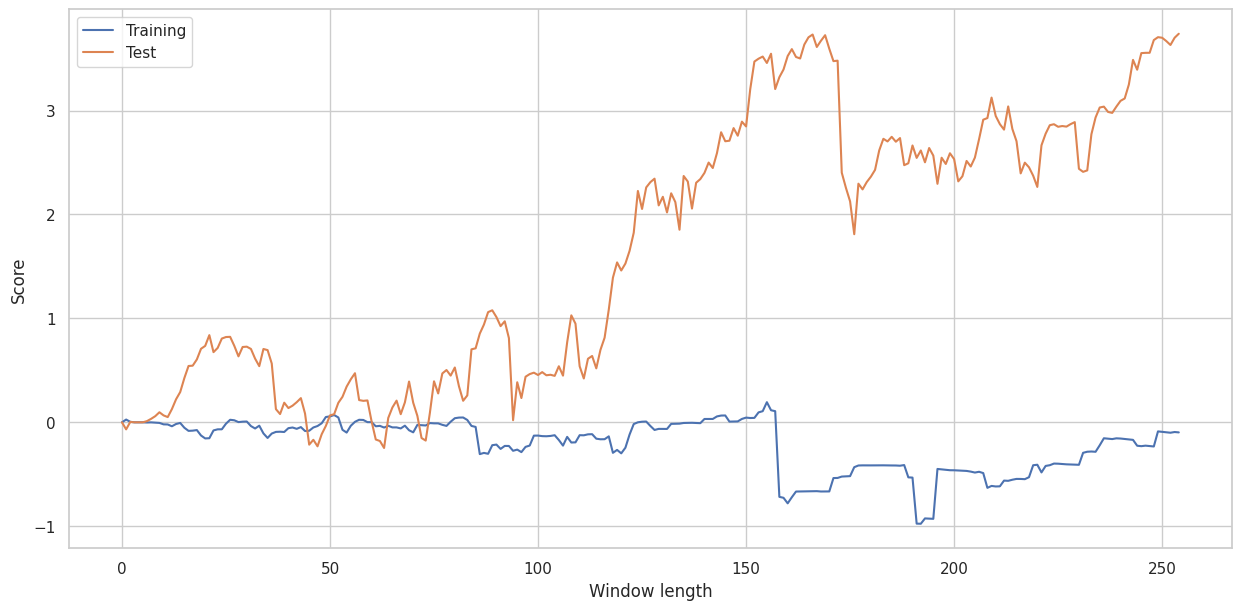

In [42]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

So really using anything above ~50 days would be a good choice for our trading window. To avoid overfitting, we can use economic reasoning to pick our window length. We can also use other techniques such as Kalman filters, which doesn't require us to specify a length. I'll cover this later in another notebook.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤—Å–µ, —á—Ç–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç ~50 –¥–Ω–µ–π, –±—É–¥–µ—Ç —Ö–æ—Ä–æ—à–∏–º –≤—ã–±–æ—Ä–æ–º –¥–ª—è –Ω–∞—à–µ–≥–æ —Ç–æ—Ä–≥–æ–≤–æ–≥–æ –æ–∫–Ω–∞. –ß—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–±–æ—Ä–∞, –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ –¥–ª—è –≤—ã–±–æ—Ä–∞ –¥–ª–∏–Ω—ã –æ–∫–Ω–∞. –ú—ã —Ç–∞–∫–∂–µ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ —Ñ–∏–ª—å—Ç—Ä—ã –ö–∞–ª–º–∞–Ω–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —Ç—Ä–µ–±—É—é—Ç —É–∫–∞–∑–∞–Ω–∏—è –¥–ª–∏–Ω—ã. –Ø —Ä–∞—Å—Å–∫–∞–∂—É –æ–± —ç—Ç–æ–º –ø–æ–∑–∂–µ –≤ –¥—Ä—É–≥–æ–º –±–ª–æ–∫–Ω–æ—Ç–µ.



---





---



# –ó–∞–≥—Ä—É–∑–∫–∞ 30 –¥–Ω–µ–π 1m 7 –¥–Ω–µ–≤–Ω—ã–º–∏ –ø–µ—Ä–∏–æ–¥–∞–º–∏ (Sider)
- Yahoo Finance –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –ø–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö 1m —Ç–æ–ª—å–∫–æ –ø–æ—Å–ª–µ–¥–Ω–∏–º–∏ 30 –¥–Ω—è–º–∏.

v0.2
- –†–∞—Å—á–µ—Ç –ø–µ—Ä–∏–æ–¥–∞ —Ä–∞–∑–±–∏—Ç –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã –ø–æ 7 –¥–Ω–µ–π.
- –î–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –∏–Ω—Ç–µ—Ä–≤–∞–ª (1m –∏–ª–∏ 1d) –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–ª–∏–Ω—ã –¥–∏–∞–ø–∞–∑–æ–Ω–∞.
- –ó–∞–≥—Ä—É–∂–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ —á–µ—Ä–µ–∑ yfinance.
- –û–±—ä–µ–¥–∏–Ω—è–µ—Ç –≤—Å–µ —Å–µ–≥–º–µ–Ω—Ç—ã –≤ –æ–¥–∏–Ω DataFrame –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ—Ç –ø–æ –≤—Ä–µ–º–µ–Ω–∏.

In [259]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏
# ticker = 'NQ=F'  # –í–∞—à —Ç–∏–∫–µ—Ä
tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM',
           'SPY', '^GSPC', '^SPX', '^IXIC', '^NDX', '^DJI', '^RUT', 'CL=F', 'GC=F', 'ES=F', 'NQ=F', 'QQQ', 'YM=F', 'YMAX', 'DJIA', 'IWM']
total_months = 3
segment_days = 7

# –¢–µ–∫—É—â–∞—è –¥–∞—Ç–∞
today = datetime.now()

# –†–∞—Å—á–µ—Ç —Å—Ç–∞—Ä—Ç–æ–≤–æ–π –¥–∞—Ç—ã (3 –º–µ—Å—è—Ü–∞ –Ω–∞–∑–∞–¥)
start_day = today - pd.DateOffset(months=total_months)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –ø–æ 7 –¥–Ω–µ–π
date_ranges = []
current_start = start_day

while current_start < today:
    current_end = current_start + timedelta(days=segment_days)
    # –ù–µ –ø—Ä–µ–≤—ã—à–∞–µ–º —Å–µ–≥–æ–¥–Ω—è—à–Ω–∏–π –¥–µ–Ω—å
    if current_end > today:
        current_end = today
    date_ranges.append((current_start, current_end))
    current_start = current_end

def download_data(ticker, start, end):
    days_diff = (end - start).days
    # –í—ã–±–æ—Ä –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞: 1m –¥–ª—è <=30 –¥–Ω–µ–π, 1d –¥–ª—è –±–æ–ª–µ–µ –¥–ª–∏–Ω–Ω—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤
    interval = '1m' if days_diff <= 30 else '1d'
    df = yf.download(
        tickers,
        start=start.strftime('%Y-%m-%d'),
        end=(end + timedelta(days=1)).strftime('%Y-%m-%d'),  # –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ
        interval=interval,
        auto_adjust=False,
        progress=False,
        # –ò–Ω–æ–≥–¥–∞ –ø–æ–º–æ–≥–∞–µ—Ç –æ—Ç–∫–ª—é—á–∏—Ç—å –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã
        prepost=False
    )['Close']
    return df

# –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ
data_frames = []

for start, end in date_ranges:
    df_segment = download_data(ticker, start, end)
    print(f"–ó–∞–≥—Ä—É–∂–µ–Ω–æ: {len(df_segment)} —Å—Ç—Ä–æ–∫ –∑–∞ {start.date()} - {end.date()} —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º { '1m' if (end-start).days <= 30 else '1d' }")
    data_frames.append(df_segment)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ DataFrame
full_data = pd.concat(data_frames)

# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º
full_data = full_data[~full_data.index.duplicated()]
full_data = full_data.sort_index()

# –ü—Ä–æ–≤–µ—Ä–∫–∞
print(f"–û–±—â–∏–π –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö: {len(full_data)} —Å—Ç—Ä–æ–∫")
print(full_data.head())

# –¢–µ–ø–µ—Ä—å full_data —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –∑–∞ 3 –º–µ—Å—è—Ü–∞, —Ä–∞–∑–¥–µ–ª—ë–Ω–Ω—ã–µ –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã –ø–æ 7 –¥–Ω–µ–π
# –ú–æ–∂–µ—Ç–µ —Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ –∏–ª–∏ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['IBM', 'YMAX', 'GC=F', 'QQQ', 'CL=F', 'JNPR', 'SPY', 'EBAY', 'AMD', 'QCOM', 'NQ=F', 'IWM', 'ES=F', 'MSFT', '^SPX', 'AAPL', 'ORCL', '^IXIC', 'YM=F', 'DJIA', '^NDX', '^RUT', '^GSPC', 'HPQ', '^DJI', 'ADBE']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-07 -> 2025-05-15) (Yahoo error = "1m data not available for startTime=1746590400 and endTime=1747281600. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-05-07 - 2025-05-14 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['YMAX', 'IBM', 'QQQ', 'GC=F', 'JNPR', 'CL=F', 'SPY', 'EBAY', 'QCOM', 'AMD', 'NQ=F', 'ES=F', 'IWM', 'MSFT', 'AAPL', '^SPX', 'YM=F', 'ORCL', '^IXIC', 'DJIA', '^NDX', 'ADBE', '^GSPC', '^RUT', '^DJI', 'HPQ']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-14 -> 2025-05-22) (Yahoo error = "1m data not available for startTime=1747195200 and endTime=1747886400. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-05-14 - 2025-05-21 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['YMAX', 'IBM', 'GC=F', 'QQQ', 'JNPR', 'CL=F', 'SPY', 'EBAY', 'AMD', 'QCOM', 'ES=F', 'NQ=F', 'IWM', 'MSFT', 'AAPL', '^SPX', 'ORCL', 'YM=F', '^IXIC', 'DJIA', '^NDX', '^RUT', '^GSPC', 'HPQ', '^DJI', 'ADBE']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-21 -> 2025-05-29) (Yahoo error = "1m data not available for startTime=1747800000 and endTime=1748491200. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-05-21 - 2025-05-28 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['YMAX', 'GC=F', 'QQQ', 'JNPR', 'CL=F', 'IBM', 'SPY', 'EBAY', 'AMD', 'QCOM', 'ES=F', 'NQ=F', 'MSFT', 'IWM', '^SPX', 'AAPL', 'ORCL', 'YM=F', 'DJIA', '^IXIC', 'ADBE', '^NDX', '^GSPC', '^RUT', 'HPQ', '^DJI']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-28 -> 2025-06-05) (Yahoo error = "1m data not available for startTime=1748404800 and endTime=1749096000. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-05-28 - 2025-06-04 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['IBM', 'YMAX', 'QQQ', 'GC=F', 'CL=F', 'JNPR', 'SPY', 'EBAY', 'AMD', 'QCOM', 'ES=F', 'NQ=F', 'MSFT', 'IWM', 'AAPL', '^SPX', 'YM=F', 'ORCL', '^IXIC', 'DJIA', '^NDX', '^RUT', '^GSPC', 'HPQ', '^DJI', 'ADBE']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-06-04 -> 2025-06-12) (Yahoo error = "1m data not available for startTime=1749009600 and endTime=1749700800. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-06-04 - 2025-06-11 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['YMAX', 'GC=F', 'QQQ', 'JNPR', 'CL=F', 'SPY', 'EBAY', 'IBM', 'AMD', 'QCOM', 'ES=F', 'NQ=F', 'MSFT', 'IWM', 'AAPL', '^SPX', 'YM=F', 'ORCL', '^IXIC', 'DJIA', 'ADBE', '^RUT', '^GSPC', 'HPQ', '^NDX', '^DJI']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-06-11 -> 2025-06-19) (Yahoo error = "1m data not available for startTime=1749614400 and endTime=1750305600. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-06-11 - 2025-06-18 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['YMAX', 'GC=F', 'QQQ', 'JNPR', 'IBM', 'SPY', 'CL=F', 'AMD', 'EBAY', 'ES=F', 'QCOM', 'NQ=F', 'IWM', 'MSFT', '^SPX', 'YM=F', 'AAPL', '^IXIC', 'ORCL', 'DJIA', '^NDX', 'ADBE', '^RUT', '^GSPC', 'HPQ', '^DJI']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-06-18 -> 2025-06-26) (Yahoo error = "1m data not available for startTime=1750219200 and endTime=1750910400. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-06-18 - 2025-06-25 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['IBM', 'YMAX', 'GC=F', 'JNPR', 'CL=F', 'SPY', 'EBAY', 'AMD', 'QCOM', 'ES=F', 'QQQ', 'NQ=F', 'IWM', 'MSFT', 'AAPL', 'YM=F', '^SPX', '^IXIC', 'ORCL', '^NDX', 'DJIA', 'ADBE', '^RUT', '^GSPC', 'HPQ', '^DJI']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-06-25 -> 2025-07-03) (Yahoo error = "1m data not available for startTime=1750824000 and endTime=1751515200. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-06-25 - 2025-07-02 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
26 Failed downloads:
ERROR:yfinance:['IBM', 'GC=F', 'YMAX', 'JNPR', 'QQQ', 'CL=F', 'EBAY', 'SPY', 'QCOM', 'AMD', 'NQ=F', 'ES=F', 'IWM', 'MSFT', 'AAPL', '^SPX', 'ORCL', 'YM=F', 'DJIA', '^IXIC', 'ADBE', '^NDX', '^GSPC', '^RUT', 'HPQ', '^DJI']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-02 -> 2025-07-10) (Yahoo error = "1m data not available for startTime=1751428800 and endTime=1752120000. The requested range must be within the last 30 days.")')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 0 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-07-02 - 2025-07-09 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-09 -> 2025-07-17)')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 7905 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-07-09 - 2025-07-16 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-16 -> 2025-07-24)')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 7907 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-07-16 - 2025-07-23 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-23 -> 2025-07-31)')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 8077 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-07-23 - 2025-07-30 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-07-30 -> 2025-08-07)')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 8245 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-07-30 - 2025-08-06 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-08-06 -> 2025-08-08)')


–ó–∞–≥—Ä—É–∂–µ–Ω–æ: 2273 —Å—Ç—Ä–æ–∫ –∑–∞ 2025-08-06 - 2025-08-07 —Å –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º 1m
–û–±—â–∏–π –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö: 28908 —Å—Ç—Ä–æ–∫
Ticker                     AAPL  ADBE  AMD       CL=F  DJIA  EBAY  ES=F  \
2025-07-09 04:00:00+00:00   NaN   NaN  NaN  68.239998   NaN   NaN   NaN   
2025-07-09 04:01:00+00:00   NaN   NaN  NaN  68.239998   NaN   NaN   NaN   
2025-07-09 04:02:00+00:00   NaN   NaN  NaN  68.239998   NaN   NaN   NaN   
2025-07-09 04:03:00+00:00   NaN   NaN  NaN  68.220001   NaN   NaN   NaN   
2025-07-09 04:04:00+00:00   NaN   NaN  NaN  68.230003   NaN   NaN   NaN   

Ticker                            GC=F  HPQ  IBM  ...  QQQ  SPY     YM=F  \
2025-07-09 04:00:00+00:00  3300.699951  NaN  NaN  ...  NaN  NaN  44459.0   
2025-07-09 04:01:00+00:00  3301.699951  NaN  NaN  ...  NaN  NaN  44467.0   
2025-07-09 04:02:00+00:00  3300.600098  NaN  NaN  ...  NaN  NaN  44464.0   
2025-07-09 04:03:00+00:00  3300.100098  NaN  NaN  ...  NaN  NaN      NaN   
2025-07-09 04:04:00+00:0

v0.1

In [255]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞
ticker = 'NQ=F'  # –í–∞—à —Å–∏–º–≤–æ–ª
today = datetime.now()

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–µ—Ä–∏–æ–¥–∞
total_months = 3
interval_days = 7

# –†–∞—Å—á–µ—Ç –¥–∞—Ç
end_date = today
start_date = end_date - pd.DateOffset(months=total_months)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –¥–∞—Ç –ø–æ 7-–¥–Ω–µ–≤–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º
date_ranges = []
current_start = start_date

while current_start < end_date:
    current_end = current_start + timedelta(days=interval_days)
    if current_end > end_date:
        current_end = end_date
    date_ranges.append((current_start, current_end))
    current_start = current_end

# –ó–∞–≥—Ä—É–∂–∞–µ–º –∏ –æ–±—ä–µ–¥–∏–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ
dfs = []

for start, end in date_ranges:
    df = yf.download(
        ticker,
        start=start.strftime('%Y-%m-%d'),
        end=end.strftime('%Y-%m-%d'),
        interval='1m',
        progress=False,
        auto_adjust=False
    )['Close']
    print(f"{start} - {end}: {len(df)} rows")
    dfs.append(df)

# yfinance –∏—Å–∫–ª—é—á–∞–µ—Ç –¥–µ–Ω—å end.
# –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –≤–∫–ª—é—á–∏—Ç—å –ø–æ–ª–Ω–æ—Å—Ç—å—é —Ç–µ–∫—É—â–∏–π –¥–µ–Ω—å, –¥–æ–±–∞–≤—å—Ç–µ end + timedelta(days=1).

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ DataFrame
full_df = pd.concat(dfs)

# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã, –µ—Å–ª–∏ –µ—Å—Ç—å
full_df = full_df[~full_df.index.duplicated()]

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –¥–∞—Ç–µ
full_df = full_df.sort_index()

# –¢–µ–ø–µ—Ä—å full_df —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –∑–∞ 3 –º–µ—Å—è—Ü–∞ —Ä–∞–∑–±–∏—Ç—ã–º–∏ –ø–æ 7-–¥–Ω–µ–≤–Ω—ã–º —Å–µ–≥–º–µ–Ω—Ç–∞–º
print(full_df)

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NQ=F']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-07 -> 2025-05-14) (Yahoo error = "1m data not available for startTime=1746590400 and endTime=1747195200. The requested range must be within the last 30 days.")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NQ=F']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-14 -> 2025-05-21) (Yahoo error = "1m data not available for startTime=1747195200 and endTime=1747800000. The requested range must be within the last 30 days.")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NQ=F']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-05-21 -> 2025-05-28) (Yahoo error = "1m data not available for startTime=1747800000 and endTime=1748404800. The requested range must be within the last 30 days.")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NQ=F']: YFPricesMissingError('possibly delisted; no price da

2025-05-07 18:52:57.869101 - 2025-05-14 18:52:57.869101: 0 rows
2025-05-14 18:52:57.869101 - 2025-05-21 18:52:57.869101: 0 rows
2025-05-21 18:52:57.869101 - 2025-05-28 18:52:57.869101: 0 rows
2025-05-28 18:52:57.869101 - 2025-06-04 18:52:57.869101: 0 rows
2025-06-04 18:52:57.869101 - 2025-06-11 18:52:57.869101: 0 rows
2025-06-11 18:52:57.869101 - 2025-06-18 18:52:57.869101: 0 rows
2025-06-18 18:52:57.869101 - 2025-06-25 18:52:57.869101: 0 rows
2025-06-25 18:52:57.869101 - 2025-07-02 18:52:57.869101: 0 rows
2025-07-02 18:52:57.869101 - 2025-07-09 18:52:57.869101: 0 rows
2025-07-09 18:52:57.869101 - 2025-07-16 18:52:57.869101: 6485 rows
2025-07-16 18:52:57.869101 - 2025-07-23 18:52:57.869101: 6490 rows
2025-07-23 18:52:57.869101 - 2025-07-30 18:52:57.869101: 6621 rows
2025-07-30 18:52:57.869101 - 2025-08-06 18:52:57.869101: 6802 rows
2025-08-06 18:52:57.869101 - 2025-08-07 18:52:57.869101: 1361 rows
Ticker                         NQ=F
2025-07-09 04:09:00+00:00  22874.50
2025-07-09 04:10: